In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("data_aud_auth.csv")

In [21]:
data.head(3)

,user_id,pass_seq,hit_rate_train,hit_rate_aud,hit_rate_aud_pass,hit_rate_aud_two,hit_rate_aud_two_pass
0,41u6bST8ZrP1yKM38o9dv4o2BF93,D K J D F D L K S K D J S F K F F L F J L D J ...,0.689683,0.789216,0.838889,0.772876,0.838462
1,4rpcTqo75HfUmIXU69L8IKk2C022,K J K F L J D F K L D K S K D L S D S F F J S ...,0.664815,0.681373,0.697222,0.671569,0.687179
2,7LP64KOIsrOFhtM5eEvUmi89aYJ2,K J K F L J D F K L D K S K D L S D S F F J S ...,0.675661,0.655229,0.636111,0.745098,0.782222


In [22]:
avg = data.mean()

C:\Users\Admin\AppData\Local\Temp/ipykernel_22032/1841347895.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg = data.mean()


In [23]:
avg

hit_rate_train           0.695370
hit_rate_aud             0.726920
hit_rate_aud_pass        0.735518
hit_rate_aud_two         0.735498
hit_rate_aud_two_pass    0.744602
dtype: float64

In [24]:
avg["hit_rate_perf_auth"] = (avg["hit_rate_aud_pass"] - avg["hit_rate_aud"]) / avg["hit_rate_aud"]
avg["hit_rate_perf_auth"]

0.011828347263862818

In [25]:
avg["hit_rate_perf_auth_two"] = (avg["hit_rate_aud_two_pass"] - avg["hit_rate_aud_two"]) / avg["hit_rate_aud_two"]
avg["hit_rate_perf_auth_two"]

0.012377285308415564

In [26]:
avg["hit_rate_perf_train_auth"] = (avg["hit_rate_aud_pass"] - avg["hit_rate_train"]) / avg["hit_rate_train"]
avg["hit_rate_perf_train_auth"]

0.05773588781000485

In [27]:
avg["hit_rate_perf_train_auth_two"] = (avg["hit_rate_aud_two_pass"] - avg["hit_rate_train"]) / avg["hit_rate_train"]
avg["hit_rate_perf_train_auth_two"]

0.070798916463031

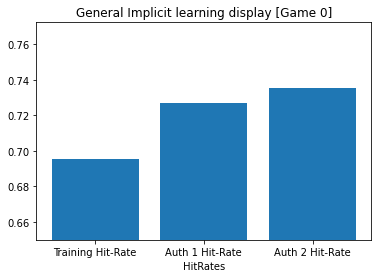

In [29]:
fig, ax = plt.subplots()
ax.bar(["Training Hit-Rate", "Auth 1 Hit-Rate", "Auth 2 Hit-Rate"], [avg["hit_rate_train"], avg["hit_rate_aud"], avg["hit_rate_aud_two"]])
plt.ylim(bottom=0.65)
plt.xlabel("HitRates")
plt.title("General Implicit learning display [Game 0]")
fig.savefig("images/hitrate-comp-audio")

In [ ]:
avg

hit_rate_train                  0.691796
hit_rate_auth                   0.714733
hit_rate_auth_pass              0.725714
hit_rate_auth_two               0.713303
hit_rate_auth_two_pass          0.716897
hit_rate_perf_auth              0.015363
hit_rate_perf_auth_two          0.005037
hit_rate_perf_train_auth        0.049029
hit_rate_perf_train_auth_two    0.036284
dtype: float64

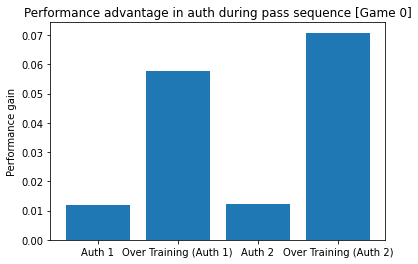

In [30]:
fig1, ax1 = plt.subplots()
ax1.bar(["Auth 1", "Over Training (Auth 1)", "Auth 2", "Over Training (Auth 2)"], 
    [avg["hit_rate_perf_auth"], avg["hit_rate_perf_train_auth"], avg["hit_rate_perf_auth_two"], avg["hit_rate_perf_train_auth_two"]])
plt.ylabel("Performance gain")
plt.title("Performance advantage in auth during pass sequence [Game 0]")
# plt.ylim(bottom=0.005)
fig1.savefig("images/hitrate-advantage-comp-audio")